In [1]:
import pystan

In [94]:
model = """
data {
  int<lower=0> N; // number of time steps
  vector[N] x; // all x[i] measurements
  real prior_a;
  real prior_a_s;
}
parameters {
  real<lower=0> alpha;
  real<lower=0> sigma;
}
model {
  alpha ~ normal(prior_a, prior_a_s);
  for (n in 2:N) {
    x[n] ~ normal( (1+alpha) * x[n-1], sigma);
  }
}
"""

In [95]:
stan = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81d3b02d654df967d1061e0ee5846071 NOW.


In [122]:
data = {
    'x': [ 1, 1.2**1+.01, 1.2**2-0.07, 1.2**3+0.03, 1.2**4-0.01 ],
    'prior_a': 0.3, # (x data was generated from an alpha=0.2)
    'prior_a_s': 1,
}
data['N'] = len(data['x'])

In [123]:
fit = stan.sampling(data=data, iter=10000, chains=4)

In [124]:
print(fit)

Inference for Stan model: anon_model_81d3b02d654df967d1061e0ee5846071.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha    0.2  9.9e-4   0.07   0.09   0.17    0.2   0.23   0.36   5054    1.0
sigma   0.17  2.7e-3   0.16   0.05   0.09   0.12   0.19   0.53   3643    1.0
lp__    2.87    0.02   1.33  -0.68   2.28   3.26   3.86   4.23   2839    1.0

Samples were drawn using NUTS at Mon Feb  5 04:41:04 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


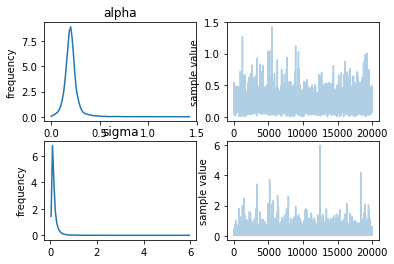

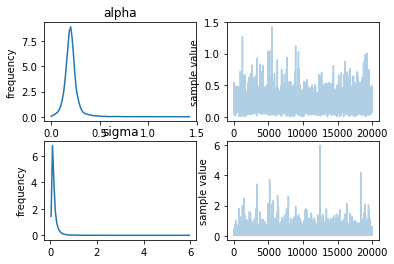

In [125]:
fit.plot()